In [1]:
import os, sys
import pyxdf as xdf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import scipy as sp
from scipy import stats
import statistics as st

from collections import Counter


markers_path = "C:\\Users\\USUARIO\\Documents\\Pompeu Fabra\\Analyzing EEG\\EEG_recordings\\Markers\\"

arm_logs_path = "C:\\Users\\USUARIO\\Documents\\Pompeu Fabra\\Analyzing EEG\\"

In [2]:
#get iterables from nested lists and tuples
def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o
        

#looking at the Cont_group_Data. Unity Markers

def markersinUnity(xdf_path, info=False, channels=None):
    
    print("-------- Fetching data... --------------")
    streams = xdf.load_xdf(xdf_path)       

    
    for i in range(len(streams[0])):
                
        # necessary to build our data frame    
        if "Exp_group_data" in streams[0][i]['info']['name'][0]:
            unitystr_time_series     = streams[0][i]['time_series']
            
             #cleaning up markers
        
            newmarkers = []
         
            for e in traverse(unitystr_time_series): # or for t2 in fixed: for e in t2
                bad_marker= type(e)
                if bad_marker == str:
                               
                    if "alter_pitch" in e or e[0] == '0':
                        newmarkers.append(6)
                    elif "SphereCollision" in e or e[0] == '1':
                        newmarkers.append(1)
                    elif "Missed" in e or e[0] == '2':
                        newmarkers.append(2)
                    elif "BombCollision" in e or e[0] == '3':
                        newmarkers.append(3)
                    elif "Sphere_wave" in e or e[0] == '4':
                        newmarkers.append(4)
                    elif "Camera_swap" in e or e[0] == '5':
                        newmarkers.append(5)
                    
                    unitystr_time_series = newmarkers
                    
                    
            unitystr_time_stamps     = streams[0][i]['time_stamps']
            unitystr_first_timestamp = np.float(unitystr_time_stamps[0]) # event start just to see for eeg important
            unitystr_time_series= np.squeeze(unitystr_time_series).astype(int)

            return pd.DataFrame({'markers': unitystr_time_series, 'time_stamps': unitystr_time_stamps})
        
        if "Cont_group_data" in streams[0][i]['info']['name'][0]:
            unitystr_time_series     = streams[0][i]['time_series']
            
             #cleaning up markers
        
            newmarkers = []
         
            for e in traverse(unitystr_time_series): # or for t2 in fixed: for e in t2
                bad_marker= type(e)
                if bad_marker == str:
                               
                    if "alter_pitch" in e or e[0] == '0':
                        newmarkers.append(6)
                    elif "SphereCollision" in e or e[0] == '1':
                        newmarkers.append(1)
                    elif "Missed" in e or e[0] == '2':
                        newmarkers.append(2)
                    elif "BombCollision" in e or e[0] == '3':
                        newmarkers.append(3)
                    elif "Sphere_wave" in e or e[0] == '4':
                        newmarkers.append(4)
                    elif "Camera_swap" in e or e[0] == '5':
                        newmarkers.append(5)
                    
                    unitystr_time_series = newmarkers
                    
            
            unitystr_time_stamps     = streams[0][i]['time_stamps']
            unitystr_first_timestamp = np.float(unitystr_time_stamps[0]) # event start just to see for eeg important
            unitystr_time_series= np.squeeze(unitystr_time_series).astype(int)
  
            return pd.DataFrame({'markers': unitystr_time_series, 'time_stamps': unitystr_time_stamps})
    

#markersinUnity(markers_path + "ExperimentalGroup\\AnnaGTrain1.xdf")

In [3]:
# meters taken as default unit in unity

pathlist = ["ArmConGroup\\Anna S\\Day 1\\log_arms.csv", "ArmConGroup\\Anna S\\Day 2\\log_arms.csv",
            "ArmConGroup\\Emily\\Day 1\\log_arms.csv", "ArmConGroup\\Emily\\Day 2\\log_arms.csv",
            "ArmConGroup\\Joseba\\Day 1\\log_arms.csv", "ArmConGroup\\Joseba\\Day 2\\log_arms.csv",
            "ArmConGroup\\Yao\\Day 1\\log_arms.csv", "ArmConGroup\\Yao\\Day 2\\log_arms.csv",             
            "ArmExpGroup\\Anna B\\Day 1\\log_arms.csv", "ArmExpGroup\\Anna B\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Anna G\\Day 1\\log_arms.csv", "ArmExpGroup\\Anna G\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Dimi\\Day 1\\log_arms.csv", "ArmExpGroup\\Dimi\\Day 2\\log_arms.csv",
            "ArmExpGroup\\Natasha\\Day 1\\log_arms.csv", "ArmExpGroup\\Natasha\\Day 2\log_arms.csv"]             

def coding_filename(pathlist=pathlist):
        
    newpathlist = []       
    for e in pathlist:
        el = e.split("\\")
        eln = [i for i in el if i not in ("", "ArmExpGroup","ArmConGroup", "log_arms.csv")]
        newpathlist.append(eln)
    


#     subjectdict = {"Anna S":"Control_Subject_1", "Emily" : "Control_Subject_2", "Joseba": " Control_Subject_3",
#                    "Yao": "Control_Subject_4", "Pablo": "Control_Subject_5", "Anna B": "Experimental_Subject_6",
#                    "Anna G": "Experimental Subject 7","Dimi": "Experimental Subject 8",
#                    "Natasha": "Experimental_Subject_9"}
    
    subjectdict = {"Anna S": "Exp1", "Emily" :"Exp2", "Joseba": "Exp3",
               "Yao": "Exp4","Anna B": "Con1",
               "Anna G": "Con2","Dimi": "Con3", "Natasha": "Con4"}


    daylist = []

    for i in range(len(newpathlist)):
        daylist.append(newpathlist[i][1][-1])
        newpathlist[i] = subjectdict[newpathlist[i][0]]
   
    
    return newpathlist, daylist



def get_name(path):
    el = path.split("\\")
    eln = [i for i in el if i not in ("", "ArmExpGroup","ArmConGroup", "log_arms.csv")]
    return eln
    


def create_dataframe():
    min_speed = []
    max_speed = []
    median_speed = []
    av_speed = []
    participants = coding_filename()[0]
    sessions = coding_filename()[1]

    for sub in pathlist:
        
        min_speed.append(find_statistics_speed(sub)[-2])
        max_speed.append(find_statistics_speed(sub)[-1])
        median_speed.append(find_statistics_speed(sub)[0])
        av_speed.append(find_statistics_speed(sub)[1])
        
    
    participants, min_speed = pd.Series(participants), pd.Series(min_speed)
    max_speed, median_speed = pd.Series(max_speed), pd.Series(median_speed)
    sessions = pd.Series(sessions)
    av_speed = pd.Series(av_speed)
    
    participants.name = "Subjects"
    min_speed.name = "Min_Speed"
    max_speed.name = "Max_Speed"
    median_speed.name = "Median_Speed"
    av_speed.name = "Average_Speed"
    sessions.name = "Sessions"
    
    speed_data = pd.concat([participants, sessions, max_speed, min_speed, av_speed, median_speed], axis = 1)
    
    
    
    return speed_data



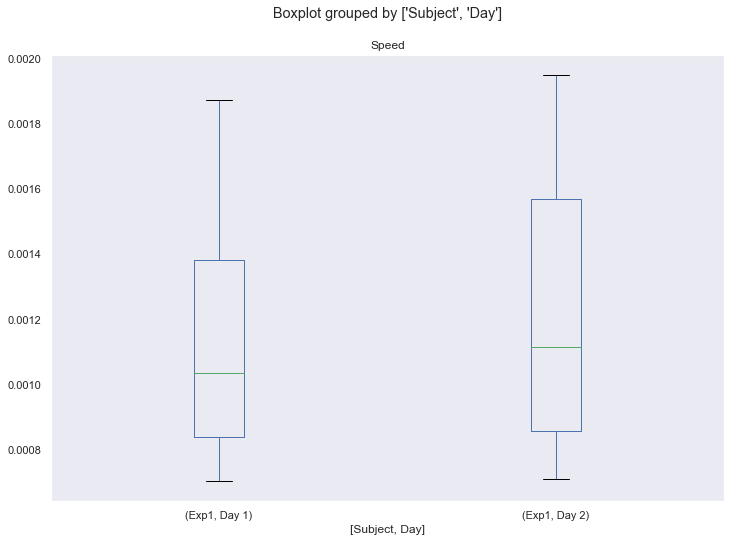

In [4]:
# subjectdict = {"Anna S": "Subject1_Con", "Emily" :"Subject2_Con", "Joseba": "Subject3_Con",
#                "Yao": "Subject5_Con","Anna B": "Subject6_Exp",
#                "Anna G": "Subject7_Exp","Dimi": "Subject8_Exp", "Natasha": "Subject9_Exp"}

subjectdict = {"Anna S": "Exp1", "Emily" :"Exp2", "Joseba": "Exp3", "Yao": "Exp4","Anna B": "Con1",
               "Anna G": "Con2","Dimi": "Con3", "Natasha": "Con4"}


def speed_array(pathlist):
    speeddict = {}
    for file in pathlist:
        name = get_name(file)[0]
        day = get_name(file)[1]
        nameday = (subjectdict[name], day)
        logarms = pd.read_csv(arm_logs_path + file, header=None, index_col=False)
        arm_movements = list(logarms[0])
        timer = list(logarms[1])
        distance = list(map(lambda x2, x1: abs(abs(x2) - abs(x1)), arm_movements [1::2], arm_movements[::2]))
        time_taken = timer[1::2]

        #speed = list(map(lambda d, t: d / t, distance[::1], time_taken[::1]))
        
              
  
        
        speed = list(filter(lambda x: 0.0007 < x <= 0.002, map(lambda d, t: d / t, distance[::1], time_taken[::1])))
        #                           0.001     0.003
        #speed_array = np.array(speed)
        
        speeddict[nameday] = speed
    
    return speeddict

def get_name(path):
    el = path.split("\\")
    eln = [i for i in el if i not in ("", "ArmExpGroup","ArmConGroup", "log_arms.csv")]
    return eln
    
speeddict = speed_array(pathlist)

subjectlist = []
daylist = []

for key in speeddict:
    for i in range(len(speeddict[key])):
        subjectlist.append(key[0])
        daylist.append(key[1])

speedlist = []
        
for key in speeddict:
    speedlist.extend(speeddict[key])
    
subseries = pd.Series(subjectlist, name= "Subject")

dayseries = pd.Series(daylist, name= "Day")

speedseries = pd.Series(speedlist, name = "Speed")


speedframe = pd.concat([subseries, dayseries, speedseries], axis = 1)



#justsubject1 = speedframe.loc[speedframe["Subject"] == "Subject1_Con"]

sns.set(rc={'figure.figsize':(11.7,8.27)})

justsubject1 = speedframe.loc[speedframe["Subject"] == "Exp1"]

justsubject1.boxplot(by = ["Subject", "Day"], column = ["Speed"], grid = False)

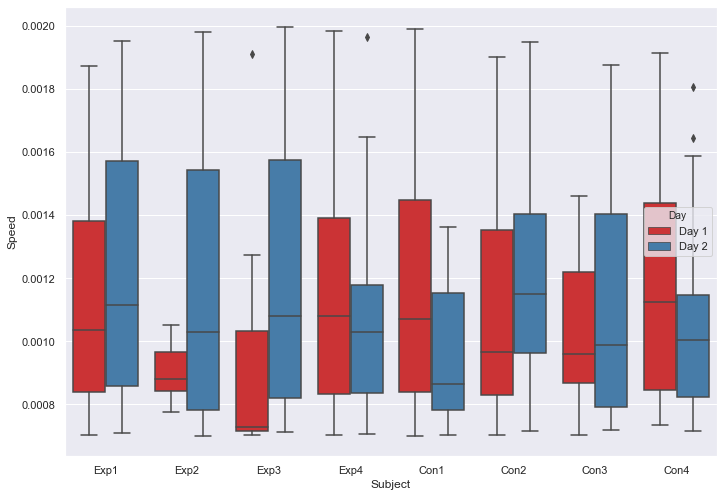

According to the Shapiro-Wilk test, samples not well distributed are con 2 day 2 and exp1 day 1


,Subject,Day,Speed
0,Exp1,Day 1,0.001374
1,Exp1,Day 1,0.000830
2,Exp1,Day 1,0.001475
3,Exp1,Day 1,0.000831
4,Exp1,Day 1,0.001170
5,Exp1,Day 1,0.001205
6,Exp1,Day 1,0.001794
7,Exp1,Day 1,0.001053
8,Exp1,Day 1,0.000884
9,Exp1,Day 1,0.000989


In [5]:
# library and dataset

speedframe

#plt.boxplot(df.Max_Speed)

#x_axis = np.arange(1, len(coding_filename()[0]) + 1, 1)
    
# Grouped boxplot
# sns.boxplot(data=speedframe, x="Subject", y="Speed", palette="Set1")

# plt.show()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(data=speedframe, x="Subject", y="Speed", hue ="Day", palette="Set1")

plt.show()


print("According to the Shapiro-Wilk test, samples not well distributed are con 2 day 2 and exp1 day 1")

speedframe

In [6]:
# eeg_pathlist = ["EEG_recordings\\Markers\\AnnaSTrain1.xdf", "EEG_recordings\\Markers\\AnnaSTrain1.xdf",
#             "EEG_recordings\\Markers\\EmilyTrain1.xdf", "EEG_recordings\\Markers\\EmilyTrain2.xdf",
#             "EEG_recordings\\Markers\\YosheTrain1.xdf", "EEG_recordings\\Markers\\YosheTrain2.xdf",
#             "EEG_recordings\\Markers\\YaoTrain1.xdf", "EEG_recordings\\Markers\\YaoTrain2.xdf",                        
#             "EEG_recordings\\Markers\\AnnaBTrain1.xdf", "EEG_recordings\\Markers\\AnnaBTrain2.xdf",
#             "EEG_recordings\\Markers\\AnnaGTrain1.xdf", "EEG_recordings\\Markers\\AnnaGTrain2.xdf",
#             "EEG_recordings\\Markers\\DimiTrain1.xdf", "EEG_recordings\\Markers\\DimiTrain2.xdf",
#             "EEG_recordings\\Markers\\NatashaTrain1.xdf", "EEG_recordings\\Markers\\NatashaTrain2.xdf"]  



def marker_data(xdf_path, info=False, channels=None):
    
    streams = xdf.load_xdf(xdf_path)       

    
    for i in range(len(streams[0])):
                
        # necessary to build our data frame    
        if "Exp_group_data" in streams[0][i]['info']['name'][0]:
            unitystr_time_series     = streams[0][i]['time_series']
            
             #cleaning up markers
        
            newmarkers = []
         
            for e in traverse(unitystr_time_series): # or for t2 in fixed: for e in t2
                bad_marker= type(e)
                if bad_marker == str:
                               
                    if "alter_pitch" in e or e[0] == '0':
                        newmarkers.append(6)
                    elif "SphereCollision" in e or e[0] == '1':
                        newmarkers.append(1)
                    elif "Missed" in e or e[0] == '2':
                        newmarkers.append(2)
                    elif "BombCollision" in e or e[0] == '3':
                        newmarkers.append(3)
                    elif "Sphere_wave" in e or e[0] == '4':
                        newmarkers.append(4)
                    elif "Camera_swap" in e or e[0] == '5':
                        newmarkers.append(5)
                    
                    unitystr_time_series = newmarkers
                    
                    
            unitystr_time_stamps     = streams[0][i]['time_stamps']
            unitystr_first_timestamp = np.float(unitystr_time_stamps[0]) # event start just to see for eeg important
            unitystr_time_series= np.squeeze(unitystr_time_series).astype(int)
            
            markers = unitystr_time_series.tolist()

            return markers
        
            
        
        if "Cont_group_data" in streams[0][i]['info']['name'][0]:
            unitystr_time_series     = streams[0][i]['time_series']
            
             #cleaning up markers
        
            newmarkers = []
         
            for e in traverse(unitystr_time_series): # or for t2 in fixed: for e in t2
                bad_marker= type(e)
                if bad_marker == str:
                               
                    if "alter_pitch" in e or e[0] == '0':
                        newmarkers.append(6)
                    elif "SphereCollision" in e or e[0] == '1':
                        newmarkers.append(1)
                    elif "Missed" in e or e[0] == '2':
                        newmarkers.append(2)
                    elif "BombCollision" in e or e[0] == '3':
                        newmarkers.append(3)
                    elif "Sphere_wave" in e or e[0] == '4':
                        newmarkers.append(4)
                    elif "Camera_swap" in e or e[0] == '5':
                        newmarkers.append(5)
                    
                    unitystr_time_series = newmarkers
                    
            
            unitystr_time_stamps     = streams[0][i]['time_stamps']
            unitystr_first_timestamp = np.float(unitystr_time_stamps[0]) # event start just to see for eeg important
            unitystr_time_series= np.squeeze(unitystr_time_series).astype(int)
  
            markers = unitystr_time_series.tolist()

            return markers
        
marker_dict = {}

marker_dict['sub1_1'] = marker_data(markers_path + "AnnaSTrain1.xdf")
marker_dict['sub1_2'] = marker_data(markers_path + "AnnaSTrain2.xdf")
marker_dict['sub2_1'] = marker_data(markers_path + "EmilyTrain1.xdf")
marker_dict['sub2_2'] = marker_data(markers_path + "EmilyTrain2.xdf")
marker_dict['sub3_1'] = marker_data(markers_path + "YosheTrain1.xdf")
marker_dict['sub3_2'] = marker_data(markers_path + "YosheTrain2.xdf")
marker_dict['sub4_1'] = marker_data(markers_path + "YaoTrain1.xdf")
marker_dict['sub4_2'] = marker_data(markers_path + "YaoTrain2.xdf")
marker_dict['sub5_1'] = marker_data(markers_path + "AnnaBTrain1.xdf")
marker_dict['sub5_2'] = marker_data(markers_path + "AnnaBTrain2.xdf")
marker_dict['sub6_1'] = marker_data(markers_path + "AnnaGTrain1.xdf")
marker_dict['sub6_2'] = marker_data(markers_path + "AnnaGTrain2.xdf")
marker_dict['sub7_1'] = marker_data(markers_path + "DimiTrain1.xdf")
marker_dict['sub7_2'] = marker_data(markers_path + "DimiTrain2.xdf")
marker_dict['sub8_1'] = marker_data(markers_path + "NatashaTrain1.xdf")
marker_dict['sub8_2'] = marker_data(markers_path + "NatashaTrain2.xdf")


marker_dict


countdict ={}

for key in marker_dict:
    countd = dict(Counter(marker_dict[key]))
    countdict[key] = countd
    
countdict

{'sub1_1': {4: 26, 1: 121, 3: 11, 2: 15},
 'sub1_2': {2: 14, 4: 25, 1: 124, 3: 12},
 'sub2_1': {4: 24, 1: 117, 2: 15, 3: 10},
 'sub2_2': {2: 17, 1: 144, 4: 25, 3: 10},
 'sub3_1': {4: 25, 1: 181, 3: 6, 2: 19},
 'sub3_2': {4: 25, 1: 159, 2: 16, 3: 10},
 'sub4_1': {4: 26, 1: 135, 2: 19, 3: 6},
 'sub4_2': {4: 25, 1: 153, 2: 10, 3: 16},
 'sub5_1': {4: 26, 6: 228, 1: 144, 2: 22, 5: 2, 3: 4},
 'sub5_2': {4: 25, 6: 225, 1: 155, 3: 16, 2: 13, 5: 2},
 'sub6_1': {1: 559, 4: 25, 6: 222, 3: 14, 2: 13, 5: 1},
 'sub6_2': {1: 342, 4: 25, 6: 225, 3: 15, 2: 14, 5: 3},
 'sub7_1': {6: 225, 2: 15, 1: 139, 4: 24, 3: 10, 5: 3},
 'sub7_2': {4: 25, 6: 225, 1: 167, 3: 4, 2: 21, 5: 3},
 'sub8_1': {},
 'sub8_2': {4: 25, 6: 225, 2: 21, 1: 152, 3: 5}}

In [7]:
#Calculate success rate

def safeget(dct, *keys):
    for key in keys:
        try:
            dct = dct[key]
        except KeyError:
            return None
    
    
    return dct

success_ratedict = {}

success_ratedict["exp1_1"] = safeget(countdict, "sub1_1").get(1) / safeget(countdict, "sub1_1").get(4) * 10
success_ratedict["exp1_2"] = safeget(countdict, "sub1_2").get(1) / safeget(countdict, "sub1_2").get(4) * 10
success_ratedict["exp2_1"] = safeget(countdict, "sub2_1").get(1) / safeget(countdict, "sub2_1").get(4) * 10
success_ratedict["exp2_2"] = safeget(countdict, "sub2_2").get(1) / safeget(countdict, "sub2_2").get(4) * 10
success_ratedict["exp3_1"] = safeget(countdict, "sub3_1").get(1) / safeget(countdict, "sub3_1").get(4) * 10
success_ratedict["exp3_2"] = safeget(countdict, "sub3_2").get(1) / safeget(countdict, "sub3_2").get(4) * 10
success_ratedict["exp4_1"] = safeget(countdict, "sub4_1").get(1) / safeget(countdict, "sub4_1").get(4) * 10
success_ratedict["exp4_2"] = safeget(countdict, "sub4_2").get(1) / safeget(countdict, "sub4_2").get(4) * 10


success_ratedict["con5_1"] = safeget(countdict, "sub5_1").get(1) / safeget(countdict, "sub5_1").get(4) * 5
success_ratedict["con5_2"] = safeget(countdict, "sub5_2").get(1) / safeget(countdict, "sub5_2").get(4) * 5


success_ratedict["con6_1"] = safeget(countdict, "sub6_1").get(1) / safeget(countdict, "sub6_1").get(4) * 3
success_ratedict["con6_2"] = safeget(countdict, "sub6_2").get(1) / safeget(countdict, "sub6_2").get(4) * 3


success_ratedict["con7_1"] = safeget(countdict, "sub7_1").get(1) / safeget(countdict, "sub7_1").get(4) * 5
success_ratedict["con7_2"] = safeget(countdict, "sub7_2").get(1) / safeget(countdict, "sub7_2").get(4) * 5

#success_ratedict["exp8_1"] = safeget(countdict, "sub8_1").get(1) / safeget(countdict, "sub8_1").get(4) * 10

success_ratedict["con8_2"] = safeget(countdict, "sub8_2").get(1) / safeget(countdict, "sub8_2").get(4) * 5

success_ratedict

# success_ratedict["exp1_1"] = countdict.get("sub1_1", {}).get(1) /(countdict.get("sub1_1", {}).get(4) * 10)
# success_ratedict["exp1_2"] = countdict.get("sub1_2", {}).get(1) /(countdict.get("sub1_2", {}).get(4) * 10)


{'exp1_1': 46.53846153846154,
 'exp1_2': 49.6,
 'exp2_1': 48.75,
 'exp2_2': 57.599999999999994,
 'exp3_1': 72.4,
 'exp3_2': 63.6,
 'exp4_1': 51.92307692307693,
 'exp4_2': 61.2,
 'con5_1': 27.692307692307693,
 'con5_2': 31.0,
 'con6_1': 67.08,
 'con6_2': 41.04,
 'con7_1': 28.958333333333336,
 'con7_2': 33.4,
 'con8_2': 30.4}

In [10]:
subjectdictplots = {"Anna S": "Con1", "Emily" :"Con2", "Joseba": "Con3", "Yao": "Con4","Anna B": "Exp1",
               "Anna G": "Exp2","Dimi": "Exp3", "Natasha": "Exp4"}


def speed_samples(pathlist):
    speeddict = {}
    for file in pathlist:
        name = get_name(file)[0]
        day = get_name(file)[1]
        nameday = (subjectdictplots[name], day)
        logarms = pd.read_csv(arm_logs_path + file, header=None, index_col=False)
        arm_movements = list(logarms[0])
        timer = list(logarms[1])
        distance = list(map(lambda x2, x1: abs(abs(x2) - abs(x1)), arm_movements [1::2], arm_movements[::2]))
        time_taken = timer[1::2]


        
        #speed = list(filter(lambda x: 0.0007 < x <= 0.002, map(lambda d, t: d / t, distance[::1], time_taken[::1])))
        speed = list(map(lambda d, t: d / t, distance[::1], time_taken[::1]))
        
        #speed_array = np.array(speed)
        
        speeddict[nameday] = speed
    
    return speeddict

#speeddict = speed_array(pathlist)

speeddict = speed_samples(pathlist)

subjectlist = []
daylist = []

for key in speeddict:
    for i in range(len(speeddict[key])):
        subjectlist.append(key[0])
        daylist.append(key[1])

speedlist = []
        
for key in speeddict:
    speedlist.extend(speeddict[key])
    
    
speeddict.keys()




speed_exp_1_1 = speeddict.get(('Exp1', 'Day 1'))
speed_exp_1_2 = speeddict.get(('Exp1', 'Day 2'))
speed_exp_2_1 = speeddict.get(('Exp2', 'Day 1'))
speed_exp_2_2 = speeddict.get(('Exp2', 'Day 2'))
speed_exp_3_1 = speeddict.get(('Exp3', 'Day 1')) # with indepent it's significant
speed_exp_3_2 = speeddict.get(('Exp3', 'Day 2'))
speed_exp_4_1 = speeddict.get(('Exp4', 'Day 1'))
speed_exp_4_2 = speeddict.get(('Exp4', 'Day 2'))
speed_con_1_1 = speeddict.get(('Con1', 'Day 1'))
speed_con_1_2 = speeddict.get(('Con1', 'Day 2'))
speed_con_2_1 = speeddict.get(('Con2', 'Day 1'))
speed_con_2_2 = speeddict.get(('Con2', 'Day 2'))
speed_con_3_1 = speeddict.get(('Con3', 'Day 1'))
speed_con_3_2 = speeddict.get(('Con3', 'Day 2'))
speed_con_4_1 = speeddict.get(('Con4', 'Day 1'))
speed_con_4_2 = speeddict.get(('Con4', 'Day 2'))

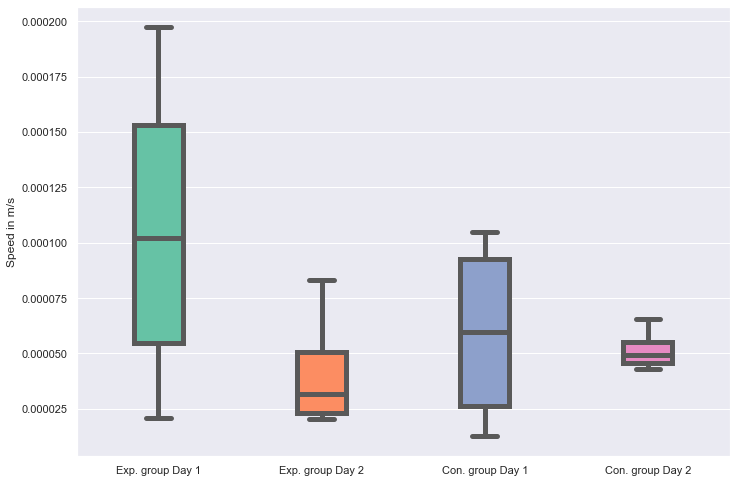

In [15]:
 
exp1_speed_mean = [st.mean(speed_exp_1_1), st.mean(speed_exp_2_1), st.mean(speed_exp_3_1), st.mean(speed_exp_4_1)]


exp2_speed_mean = [st.mean(speed_exp_1_2), st.mean(speed_exp_2_2), st.mean(speed_exp_3_2), st.mean(speed_exp_4_2)] 

con1_speed_mean = [st.mean(speed_con_1_1), st.mean(speed_con_2_1), st.mean(speed_con_3_1), st.mean(speed_con_4_1)]

con2_speed_mean = [st.mean(speed_con_1_2), st.mean(speed_con_2_2), st.mean(speed_con_3_2), st.mean(speed_con_4_2)]


overall_mean_day1 = exp1_speed_mean + con1_speed_mean

overall_mean_day2 = exp2_speed_mean + con2_speed_mean


Exp_overall_mean = exp1_speed_mean + exp2_speed_mean

Con_overall_mean = con1_speed_mean + con2_speed_mean



# #build data frame to plot days and groups. TOTAL 4

speed_day1_expseries = pd.Series(exp1_speed_mean, name="Exp. group Day 1")

speed_day2_expseries = pd.Series(exp2_speed_mean, name="Exp. group Day 2")

speed_day1_conseries = pd.Series(con1_speed_mean, name="Con. group Day 1")

speed_day2_conseries = pd.Series(con2_speed_mean, name="Con. group Day 2")


meanspeedframe = pd.concat([speed_day1_expseries, speed_day2_expseries, speed_day1_conseries, speed_day2_conseries], axis = 1)

#sp.stats.kruskal(exp1_speed_mean, exp2_speed_mean, con1_speed_mean, con2_speed_mean)

#sp.stats.wilcoxon(exp1_speed_mean, con1_speed_mean)




#meanspeedframe.boxplot(column = ["Mean Speed 1 Exp", "Mean Speed 2 Exp", "Mean Speed 1 Con", "Mean Speed 2 Con"] )

meanspeedframe

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(ylabel="Speed in m/s")

sns.boxplot(data=meanspeedframe, palette="Set2", saturation=1, linewidth=5, width=0.3)

#plt.savefig("overall_speed.png")

plt.show()


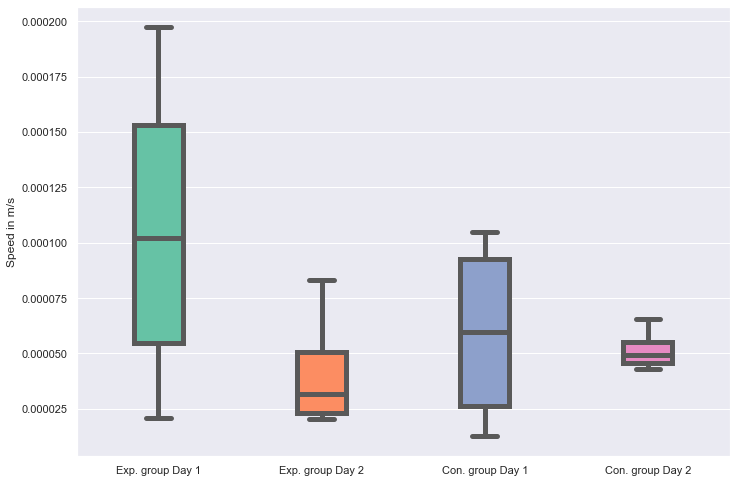

In [17]:
 
exp1_speed_median = [st.median(speed_exp_1_1), st.median(speed_exp_2_1), st.median(speed_exp_3_1), st.median(speed_exp_4_1)]


exp2_speed_median = [st.median(speed_exp_1_2), st.median(speed_exp_2_2), st.median(speed_exp_3_2), st.median(speed_exp_4_2)] 

con1_speed_median = [st.median(speed_con_1_1), st.median(speed_con_2_1), st.median(speed_con_3_1), st.median(speed_con_4_1)]

con2_speed_median = [st.median(speed_con_1_2), st.median(speed_con_2_2), st.median(speed_con_3_2), st.median(speed_con_4_2)]


overall_median_day1 = exp1_speed_median + con1_speed_median

overall_median_day2 = exp2_speed_median + con2_speed_median


Exp_overall_median = exp1_speed_median + exp2_speed_median

Con_overall_median = con1_speed_median + con2_speed_median



# #build data frame to plot days and groups. TOTAL 4

medianspeed_day1_expseries = pd.Series(exp1_speed_median, name="Exp. group Day 1")

medianspeed_day2_expseries = pd.Series(exp2_speed_median, name="Exp. group Day 2")

medianspeed_day1_conseries = pd.Series(con1_speed_median, name="Con. group Day 1")

medianspeed_day2_conseries = pd.Series(con2_speed_median, name="Con. group Day 2")


medianspeedframe = pd.concat([medianspeed_day1_expseries, medianspeed_day2_expseries,
                              medianspeed_day1_conseries, medianspeed_day2_conseries], axis = 1)

#sp.stats.kruskal(exp1_speed_mean, exp2_speed_mean, con1_speed_mean, con2_speed_mean)

#sp.stats.wilcoxon(exp1_speed_mean, con1_speed_mean)



sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(ylabel="Speed in m/s")

sns.boxplot(data=meanspeedframe, palette="Set2", saturation=1, linewidth=5, width=0.3)

plt.savefig("overall_speed.png")

plt.show()

In [ ]:
#sp.stats.wilcoxon(exp1_speed_median)

sp.stats.mannwhitneyu(overall_median_day1, overall_median_day2)


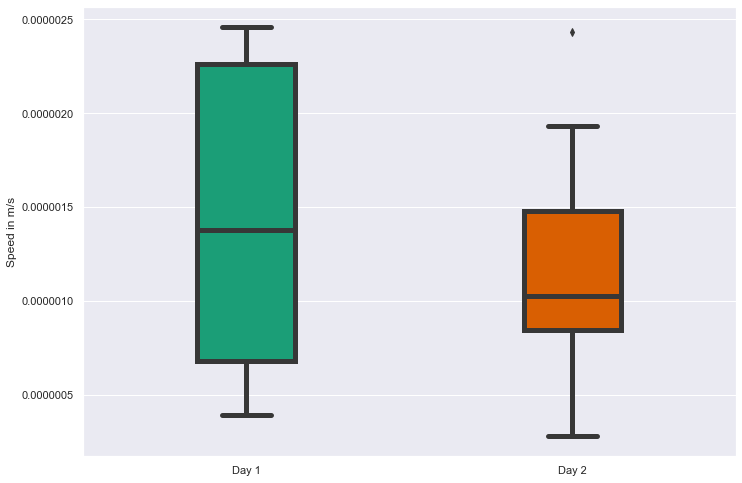

In [19]:
overall_median_day1 = exp1_speed_median + con1_speed_median

overall_median_day2 = exp2_speed_median + con2_speed_median

overallmedianspeed_day1 = pd.Series(overall_median_day1, name="Day 1")

overallmedianspeed_day2 = pd.Series(overall_median_day2, name="Day 2")

overallmedianspeedframe = pd.concat([overallmedianspeed_day1, overallmedianspeed_day2], axis = 1)


sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.axes(ylabel="Speed in m/s")

sns.boxplot(data=overallmedianspeedframe, palette="Dark2", saturation=1, linewidth=5, width=0.3)

plt.savefig("speed1vspeed2.png")

plt.show()

#sp.stats.wilcoxon(overallmedianspeed_day2)

In [ ]:
medianspeed_day1_expseries = pd.Series(exp1_speed_median, name= "Median Speed 1 Exp")

medianspeed_day2_expseries = pd.Series(exp2_speed_median, name= "Median Speed 2 Exp")

medianspeedframe_4_exp = pd.concat([medianspeed_day1_expseries, medianspeed_day2_expseries], axis = 1)

sns.boxplot(data=medianspeedframe_4_exp, palette="Set2")

plt.savefig("Exp day 1 vs day 2.png")

sp.stats.mannwhitneyu(exp2_speed_median, exp1_speed_median)



In [ ]:
medianspeed_day1_conseries = pd.Series(con1_speed_median, name= "Median Con 1 Exp")

medianspeed_day2_conseries = pd.Series(con2_speed_median, name= "Median Con 2 Exp")

medianspeedframe_4_con = pd.concat([medianspeed_day1_conseries, medianspeed_day2_conseries], axis = 1)

sns.boxplot(data=medianspeedframe_4_con, palette="Set3")

plt.savefig("con day 1 vs con 2.png")

sp.stats.wilcoxon(con1_speed_median, con2_speed_median)

